# Problem statement

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
# import the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import re

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
# Read the data from CSV

rawData = pd.read_csv("Elon_musk.csv",error_bad_lines=False,encoding='iso8859_2')
rawData

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
data = [x.strip() for x in rawData.Text] # strip the white spaces
data = [x for x in data if x]            # remove the empty strings
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [4]:
len(data) # Check the length of the data if there were any empty strings

1999

In [5]:
type(data) # check the type of the data, it is obvious that it is a list but still want to reconfirm.

list

In [6]:
# Define a function to clean the text / reviews, which will be appied on the dataset

def clean(txt):
    txt = re.sub(r'<[A-Z+0-9]+>+',"",txt)  # to remove unicode charechters
    txt = re.sub(r'[a-zA-Z]+://t.co/.+','',txt) # to remove url
    txt = re.sub(r'@\w+\s','',txt)   # to remove usernames
    txt = re.sub(r'\W\Z','',txt)    # to remove non word at the end of the sentence
    txt = re.sub(r'&amp','',txt)    # to remove ampercent
    txt = re.sub(r'[!"#$%&\'()*+,-./+:;<=>?@[\]^_`{|}~]','',txt)  # to remove symbols
    txt = re.sub(r'\d','',txt)   # to remove digits
    txt = txt.encode('ascii','ignore')   
    txt = txt.decode()
    txt = re.sub(r'\n','',txt)
    return txt

In [7]:
# Apply clean function on the dataset

text = []
for ind,txt in enumerate(data):
    text.append(clean(txt).strip())
#     print(ind,'--', clean(txt))
print(text)

['Im an alien', 'Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it', 'Great interview', 'Doge is underestimated', 'Congratulations Tesla China for amazing execution last year Now on to the next for even more', 'Happy New Year of the Ox', 'Frodo was the underdogeAll thought he would failHimself most of all', 'Haha thanks', 'Indeed Tweets definitely do not represent realworld time allocation', 'The most entertaining outcome is the most likely', 'Just sent some', 'Just agree to do Clubhouse with kanyewest', '', 'Its getting real', 'Bought some Dogecoin for lil X so he can be a toddler hodler', 'He definitely has issues but the sentencing seems a bit high', 'Thanks for fixing', 'Please unlock my account', '', 'This is true power haha', 'Any crypto wallet that wont give you your private keys should be avoided at all costs', 'Your app sucks', 'RT SpaceX NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission', 'Yes', 'Once w

In [8]:
# Remove the empty strings from the list

text = [x.lower() for x in text if x]
print(text)

['im an alien', 'ray tracing on cyberpunk with hdr is nextlevel have you tried it', 'great interview', 'doge is underestimated', 'congratulations tesla china for amazing execution last year now on to the next for even more', 'happy new year of the ox', 'frodo was the underdogeall thought he would failhimself most of all', 'haha thanks', 'indeed tweets definitely do not represent realworld time allocation', 'the most entertaining outcome is the most likely', 'just sent some', 'just agree to do clubhouse with kanyewest', 'its getting real', 'bought some dogecoin for lil x so he can be a toddler hodler', 'he definitely has issues but the sentencing seems a bit high', 'thanks for fixing', 'please unlock my account', 'this is true power haha', 'any crypto wallet that wont give you your private keys should be avoided at all costs', 'your app sucks', 'rt spacex nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission', 'yes', 'once we can pr

In [9]:
for i,x in enumerate(text):
    print(i, '--', x)

0 -- im an alien
1 -- ray tracing on cyberpunk with hdr is nextlevel have you tried it
2 -- great interview
3 -- doge is underestimated
4 -- congratulations tesla china for amazing execution last year now on to the next for even more
5 -- happy new year of the ox
6 -- frodo was the underdogeall thought he would failhimself most of all
7 -- haha thanks
8 -- indeed tweets definitely do not represent realworld time allocation
9 -- the most entertaining outcome is the most likely
10 -- just sent some
11 -- just agree to do clubhouse with kanyewest
12 -- its getting real
13 -- bought some dogecoin for lil x so he can be a toddler hodler
14 -- he definitely has issues but the sentencing seems a bit high
15 -- thanks for fixing
16 -- please unlock my account
17 -- this is true power haha
18 -- any crypto wallet that wont give you your private keys should be avoided at all costs
19 -- your app sucks
20 -- rt spacex nasa has selected falcon heavy to launch the first two elements of the lunar ga

534 -- were still far from simply video in control out the biggest gamechanger cu
535 -- fsd beta  coming out in a few days improvement should be significant
536 -- exciting mission
537 -- wow
538 -- yea
539 -- tomorrow will be the th flight of this rocket landing on droneship of course i still love you
540 -- sure
541 -- true
542 -- we have quiet a queue of products to build better do new roadster at some point
543 -- fate loves irony but hates hypocrisy
544 -- rt nasa booster separation secondengine start and fairing separation as the useuropean sentinel michael freilich oceanobserving
545 -- yes
546 -- our data center was named skynet as a joke over  years ago might have been tempting fate
547 -- tesla is a vehicle for creating  producing many useful products
548 -- largest cast titanium part in the world no heat shielding needed
549 -- landing at vandenberg afb in california
550 -- actually off to the side so it doesnt take out the launch
551 -- where it should be
552 -- because i 

773 -- lowering starlink terminal cost which may sound rather pedestrian is actually our most difficult technical challenge
774 -- as soon as we get regulatory approval hopefully around middle of next year
775 -- right now it takes about  mins to set up but with future improvements probably less than  mi
776 -- canada and norway are next after we get us out of early beta
777 -- didnt realize that was possible no problem if theres a way get current design cybertruck approved in europe
778 -- as soon as we get country approval this is required for each country individually as no euwide approval
779 -- lower latitude states need more satellites in position so probably january
780 -- several thousand more starlink beta participation invitations going out this week
781 -- new design is better with many minor tweaks even the small details matter
782 -- haha
783 -- very close to actual expected flight
784 -- i could not be more excited about the new supercollider that said while it is conside

1195 -- at first i thought that was a parrot
1196 -- they remind me of these guys
1197 -- story of my life
1198 -- tunnels under cities with selfdriving electric cars will feel like warp drivefirst operational tunnel under vega
1199 -- for sure
1200 -- good point
1201 -- have you hugged a tunnel today
1202 -- good analysis
1203 -- exactly
1204 -- gary the snail is still winning but were gaining on himher
1205 -- embrace tunnels
1206 -- tunnels are the solution to traffic you can have as many levels as you want usable tunnel depth far e
1207 -- just a guess but probably mid teens booster  stacking on orbital pad are likely limiti
1208 -- pretty accurate simulation although sn will use  raptors if sn craters sn  sn are close behind
1209 -- couldnt agree more  major software improvements are already in place to extend its life  more coming
1210 -- definitely not smartwatches  phones are yesterdays technology neuralinks are the future
1211 -- seems like they should make a whole outfit out 

1348 -- was just there  weather was calm sure hope it stays that way
1349 -- tesla brake lights are powered by a miniverse inside a microverse
1350 -- exactly
1351 -- no were focused on developing new products  scaling production
1352 -- yes will show v still far from lasik but could get pretty close in a few years
1353 -- lengthy background on neuralink by
1354 -- live webcast of working devicefriday pm pacific
1355 -- astronaughty
1356 -- no
1357 -- mars is easier than the moon for propellant production could get
1358 -- starship propellant is  oxygen so an o plant on the moon would be enou
1359 -- now i want candy
1360 -- theres a lot of frozen co  ho on mars heating the planet will densify the atmosphere its solvable
1361 -- perhaps one day there will be an ocean on the northern part of mars
1362 -- its almost working reliably
1363 -- very different computers are needed for training vs inference fsd is mostly int but dojo is
1364 -- not exactly gpus for nn lots of cores optimized f

1503 -- sorry to hear this what can we do to help
1504 -- no surprise
1505 -- aiming to make it super fun
1506 -- a little toastier each flight
1507 -- same hex tiles slightly different mounting method need bigger sections of tiles to see how they hold up
1508 -- sn will be new alloy test tank taken to burst pressure sn will have body flaps  nosecone
1509 -- sn    at starship production complex in texas
1510 -- one day soon i will wear this outfit
1511 -- i was trying to channel herb tarlek from wkrp
1512 -- note the fabulous plaid jacket  gingham shirt combo
1513 -- twin peaks
1514 -- working on my moms cousins farm in saskatchewan at age  i think we did a barnraising that day
1515 -- not sure yet but hopefully will need leg  other repairs probably sn flies before sn we need
1516 -- clearly
1517 -- rt erdayastronaut spot the tiny humans this shot really puts it into scale a full blown starship and superheavy will be hard to fat
1518 -- also true
1519 -- over time since we give all emp

1838 -- absolutely
1839 -- probably a good one to design  engineer in germany
1840 -- even more
1841 -- ok
1842 -- berlin model y is the one to watch that is a revolution in automotive body engineering finally
1843 -- true
1844 -- wow ihop  github are close
1845 -- best use of the term full stack
1846 -- for sure this is both great  terrifying everything weve ever sensed or thought has been
1847 -- yes
1848 -- sorry should hopefully be soon
1849 -- not actually a payout just a vesting of stock options it may never pay out as the stock cant b
1850 -- no easy way to answer this in a tweet but helping with dire brain injuries is our first priority details aug
1851 -- ai symbiosis while u wait
1852 -- theres some of that too
1853 -- true it sounds so surreal but the negative propaganda is still all out there  easy to find in social me
1854 -- make sure to read ur terms  conditions before clicking accept
1855 -- samwise gamgee
1856 -- altho dumb and dumber is
1857 -- progress update august


In [10]:
# Converting the data in a dataframe

Text_df = pd.DataFrame(pd.Series(text),columns=['sentence'])

In [11]:
# reading the affinity scores from csv file

affin = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [12]:
# Converting affinity scores into a dict object

affinity_scores = affin.set_index('word')['value'].to_dict()
print(affinity_scores)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [13]:
# alternate way to convert to a dictionary

# dict(zip(affin.word,affin.value))

In [14]:
# parts of speech tagging

nlp = spacy.load('en_core_web_sm')

In [15]:
# custom function to score each sentence.

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0) #sentiment_lexicon
    return sent_score

In [16]:
# applying the calculate_sentiment on each sentence and creating a new column for scores

Text_df['sentiment_value'] = Text_df['sentence'].apply(calculate_sentiment)
Text_df.head()

,sentence,sentiment_value
0,im an alien,0
1,ray tracing on cyberpunk with hdr is nextlevel...,0
2,great interview,3
3,doge is underestimated,-1
4,congratulations tesla china for amazing execut...,6


In [17]:
# calculating the words in each sentence

Text_df['word_count'] = Text_df['sentence'].str.split().apply(len)
Text_df.head(10)

,sentence,sentiment_value,word_count
0,im an alien,0,3
1,ray tracing on cyberpunk with hdr is nextlevel...,0,12
2,great interview,3,2
3,doge is underestimated,-1,3
4,congratulations tesla china for amazing execut...,6,16
5,happy new year of the ox,3,6
6,frodo was the underdogeall thought he would fa...,0,11
7,haha thanks,5,2
8,indeed tweets definitely do not represent real...,0,9
9,the most entertaining outcome is the most likely,2,8


In [18]:
# Sentiment score of the whole review

Text_df.describe()

,sentiment_value,word_count
count,1858.000000,1858.000000
mean,0.786868,8.935414
std,1.876878,6.259694
min,-7.000000,1.000000
25%,0.000000,3.000000
50%,0.000000,8.000000
75%,2.000000,14.000000
max,12.000000,30.000000


In [19]:
# Sentiment score of the whole review filter for negetive scores

Text_df[Text_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count
3,doge is underestimated,-1,3
14,he definitely has issues but the sentencing se...,-2,11
18,any crypto wallet that wont give you your priv...,-1,16
19,your app sucks,-3,3
23,starlink is a staggeringly difficult technical...,-1,12


In [20]:
# Sentiment score of the whole review filter for scores above 10

Text_df[Text_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
424,it will get absurdly good tesla aiautopilot en...,10,16
433,its a good to great game imo but improving wha...,10,17
1091,thanks tesla team for great work on deliveries...,10,19
1220,one way or another excitement guaranteed suppo...,11,17
1269,great trip to germany support from government ...,10,11


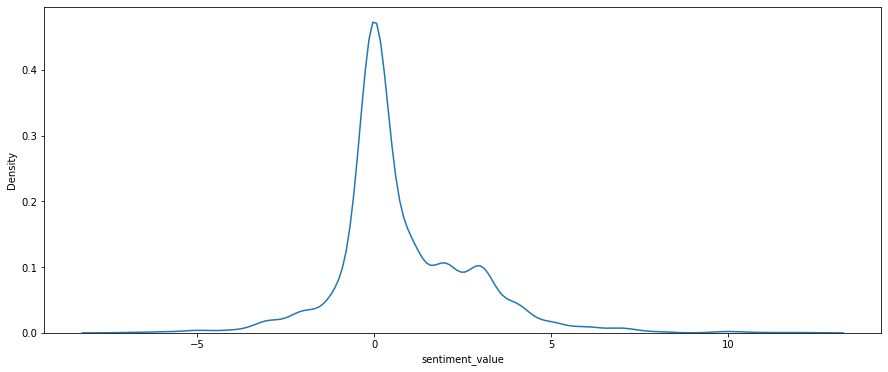

In [21]:
# plotting the distribution of the sentiment scores

import seaborn as sns
fig,ax = plt.subplots(1,1,figsize=(15,6))
# sns.histplot(Text_df['sentiment_value'],ax=ax)
sns.kdeplot(Text_df['sentiment_value'],ax=ax)
plt.show()
# sns.displot(Text_df['sentiment_value'],kind='ecdf')

#### Most of the sentiment is neutral but skewed towards positive

<AxesSubplot:ylabel='sentiment_value'>

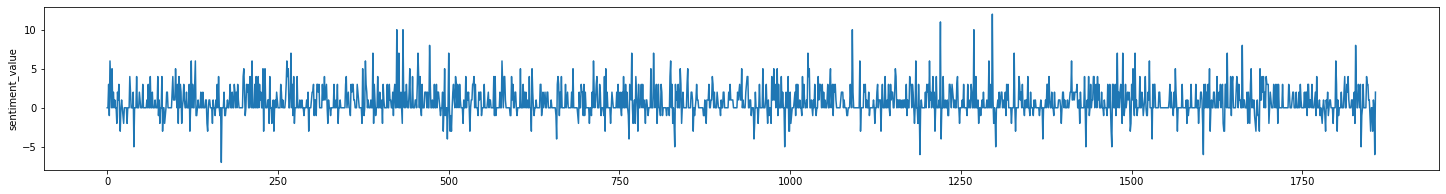

In [22]:
# indexwise plotting of the scores to check the trend

plt.figure(figsize=(25, 3))
sns.lineplot(y='sentiment_value',x=Text_df.index,data=Text_df)

***The above plot clearly shows Positive tweets outnumber the negetive tweets.***

<AxesSubplot:title={'center':'sentiment value vs word count'}, xlabel='word_count', ylabel='sentiment_value'>

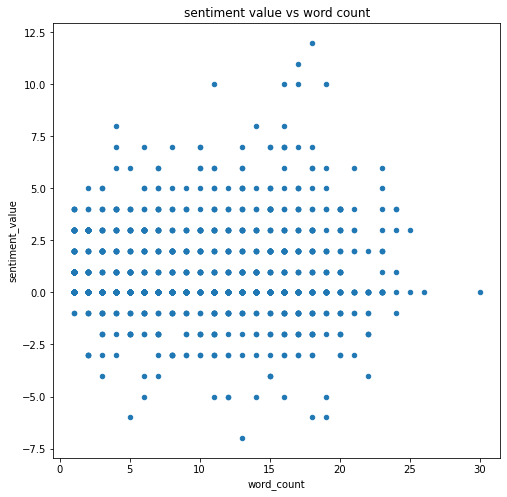

In [23]:
# comparing the word count and sentiment score

Text_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='sentiment value vs word count')

#### Even the `Sentiment vs words` plot shows that the general sentiment is positive. 